In [6]:
# 📌 STEP 1: Importa le librerie
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns



# 📌 STEP 3: Leggi il file CSV
# Sostituisci con il nome corretto se diverso
df = pd.read_csv("./dataset_completo_ultimo_senza_sentiment.csv")

# 📌 STEP 4: Pulisci i dati (converte colonne numeriche se serve)
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['commentsCount'] = pd.to_numeric(df['commentsCount'], errors='coerce')



commenti e like per periodo

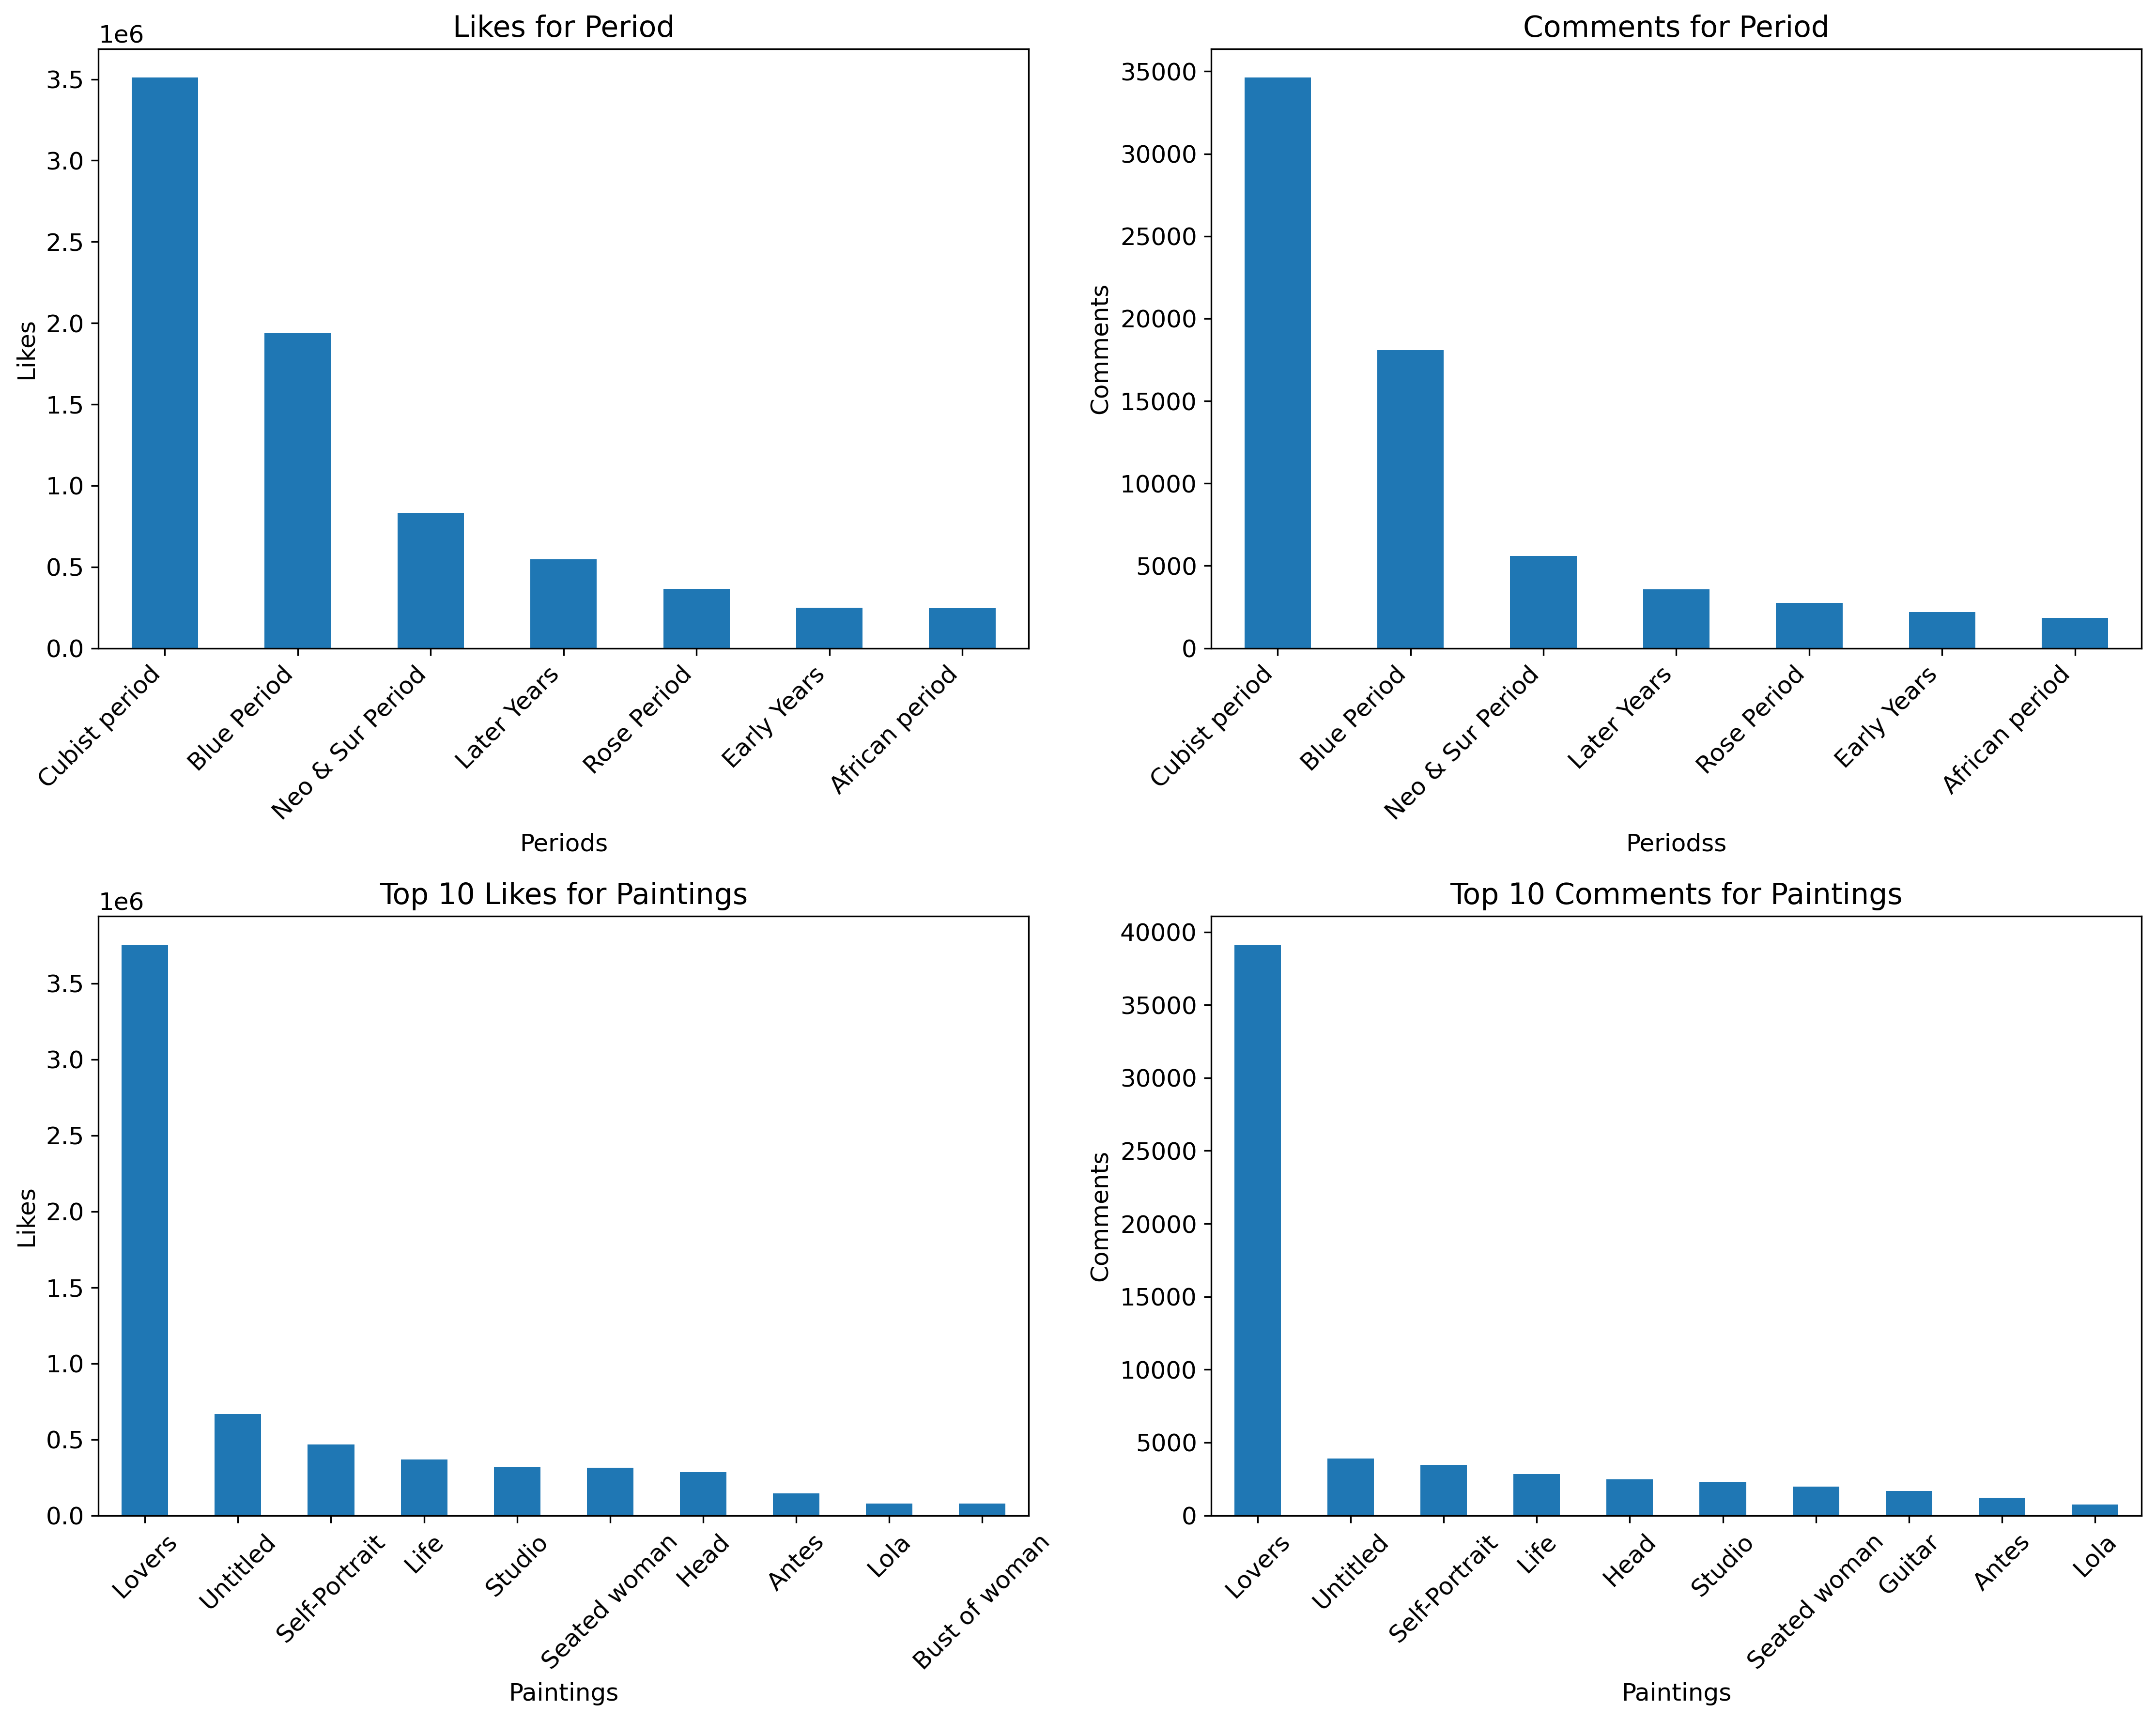

In [7]:
# Calculate the data for the plots
likes_per_style = df.groupby('Stile')['likes'].sum().sort_values(ascending=False)
comments_per_style = df.groupby('Stile')['commentsCount'].sum().sort_values(ascending=False)
likes_per_quadro = df.groupby('Nome Quadro')['likes'].sum().sort_values(ascending=False)
comments_per_quadro = df.groupby('Nome Quadro')['commentsCount'].sum().sort_values(ascending=False)

#fontsize
plt.rcParams.update({'font.size': 12})

# Create the 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(15, 12), dpi=300) # Adjust figsize as needed for better readability

# Plot 1: Likes per Style
likes_per_style.plot(kind='bar', ax=axes[0, 0], title='Likes for Period', ylabel='Likes', xlabel='Periods')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

# Plot 2: Comments per Style
comments_per_style.plot(kind='bar', ax=axes[0, 1], title='Comments for Period', ylabel='Comments', xlabel='Periodss')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha='right')

# Plot 3: Top 10 Likes per Painting
likes_per_quadro.head(10).plot(kind='bar', ax=axes[1, 0], title='Top 10 Likes for Paintings', ylabel='Likes', xlabel='Paintings')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha='center') # ha='center' is often good for 90 degree rotation

# Plot 4: Top 10 Comments per Painting
comments_per_quadro.head(10).plot(kind='bar', ax=axes[1, 1], title='Top 10 Comments for Paintings', ylabel='Comments', xlabel='Paintings')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='center') # ha='center' is often good for 90 degree rotation

plt.tight_layout() # Adjusts subplot params for a tight layout
plt.show()

questo analizza i luoghi di conservazione

In [8]:
import pandas as pd

# Creo la mappatura da location a nazione
location_to_nation = {
    'Barcelona, Spain': 'Spain',
    'Cafè Pablo': 'Spain',
    'Casa de Velázquez': 'France',
    'Chateau De Vauvenargues': 'France',
    'Disseny Hub Barcelona': 'Spain',
    'Escola Angel Baixeras': 'Spain',
    "MACBA Museu d'Art Contemporani de Barcelona": 'Spain',
    'Mandarin Oriental, Barcelona': 'Spain',
    'Museo Picasso': 'Spain',  # Ambiguo, ma assumiamo Barcellona
    'Museu Picasso': 'Spain',
    'Museu Picasso Barcelona': 'Spain',
    'Museu de Solsona': 'Spain',
    'Sitges': 'Spain',
}

# Specifica il nome del tuo file CSV
file_csv = './dataset_completo_ultimo_nazioni.csv'  # Sostituisci con il nome effettivo del tuo file CSV

try:
    # Applica la mappatura alla colonna 'locationName' per creare la nuova colonna 'nation'
    # Se una locationName non è presente nel dizionario, 'nation' sarà NaN (Not a Number)
    df['nation'] = df['locationName'].map(location_to_nation)

    # Mostra le prime righe del DataFrame con le colonne 'locationName' e 'nation'
    print("Prime righe del DataFrame con le nuove colonne:")
    print(df[['locationName', 'nation']].head())

    print("\n---")

    # Mostra tutti i valori unici di 'locationName' e la 'nation' associata che sono stati mappati
    print("Valori unici di 'locationName' e 'nation' mappata:")
    print(df[['locationName', 'nation']].dropna().drop_duplicates())

except FileNotFoundError:
    print(f"Errore: Il file '{file_csv}' non è stato trovato. Assicurati che il file sia nella stessa directory dello script o fornisci il percorso completo.")
except KeyError:
    print("Errore: La colonna 'locationName' non è stata trovata nel tuo file CSV. Controlla il nome della colonna.")
except Exception as e:
    print(f"Si è verificato un errore inatteso: {e}")

Prime righe del DataFrame con le nuove colonne:
  locationName nation
0          NaN    NaN
1          NaN    NaN
2          NaN    NaN
3          NaN    NaN
4          NaN    NaN

---
Valori unici di 'locationName' e 'nation' mappata:
                                     locationName  nation
8                         Museu Picasso Barcelona   Spain
26                                  Museo Picasso   Spain
420                             Casa de Velázquez  France
447                                 Museu Picasso   Spain
763                              Barcelona, Spain   Spain
894                       Chateau De Vauvenargues  France
1488                                       Sitges   Spain
1540                 Mandarin Oriental, Barcelona   Spain
1676                        Escola Angel Baixeras   Spain
1816                        Disseny Hub Barcelona   Spain
1828                             Museu de Solsona   Spain
4037  MACBA Museu d'Art Contemporani de Barcelona   Spain
5128      

C:\Users\franc\AppData\Local\Temp\ipykernel_18388\1587803001.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loc_counts.values, y=loc_counts.index, palette='viridis', ax=axes[0])
C:\Users\franc\AppData\Local\Temp\ipykernel_18388\1587803001.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loc_likes.values, y=loc_likes.index, palette='magma', ax=axes[1])
C:\Users\franc\AppData\Local\Temp\ipykernel_18388\1587803001.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loc_comments.values, y=loc_comments.index, palette='coolwarm', 

D:\Lavori\ARTICOLI\Bilotta_picasso 2025\Codici\V2\PLOT-300DPI\SOCIAL VALIDATIONS\Plots saved as locations_with_nation_plots.png


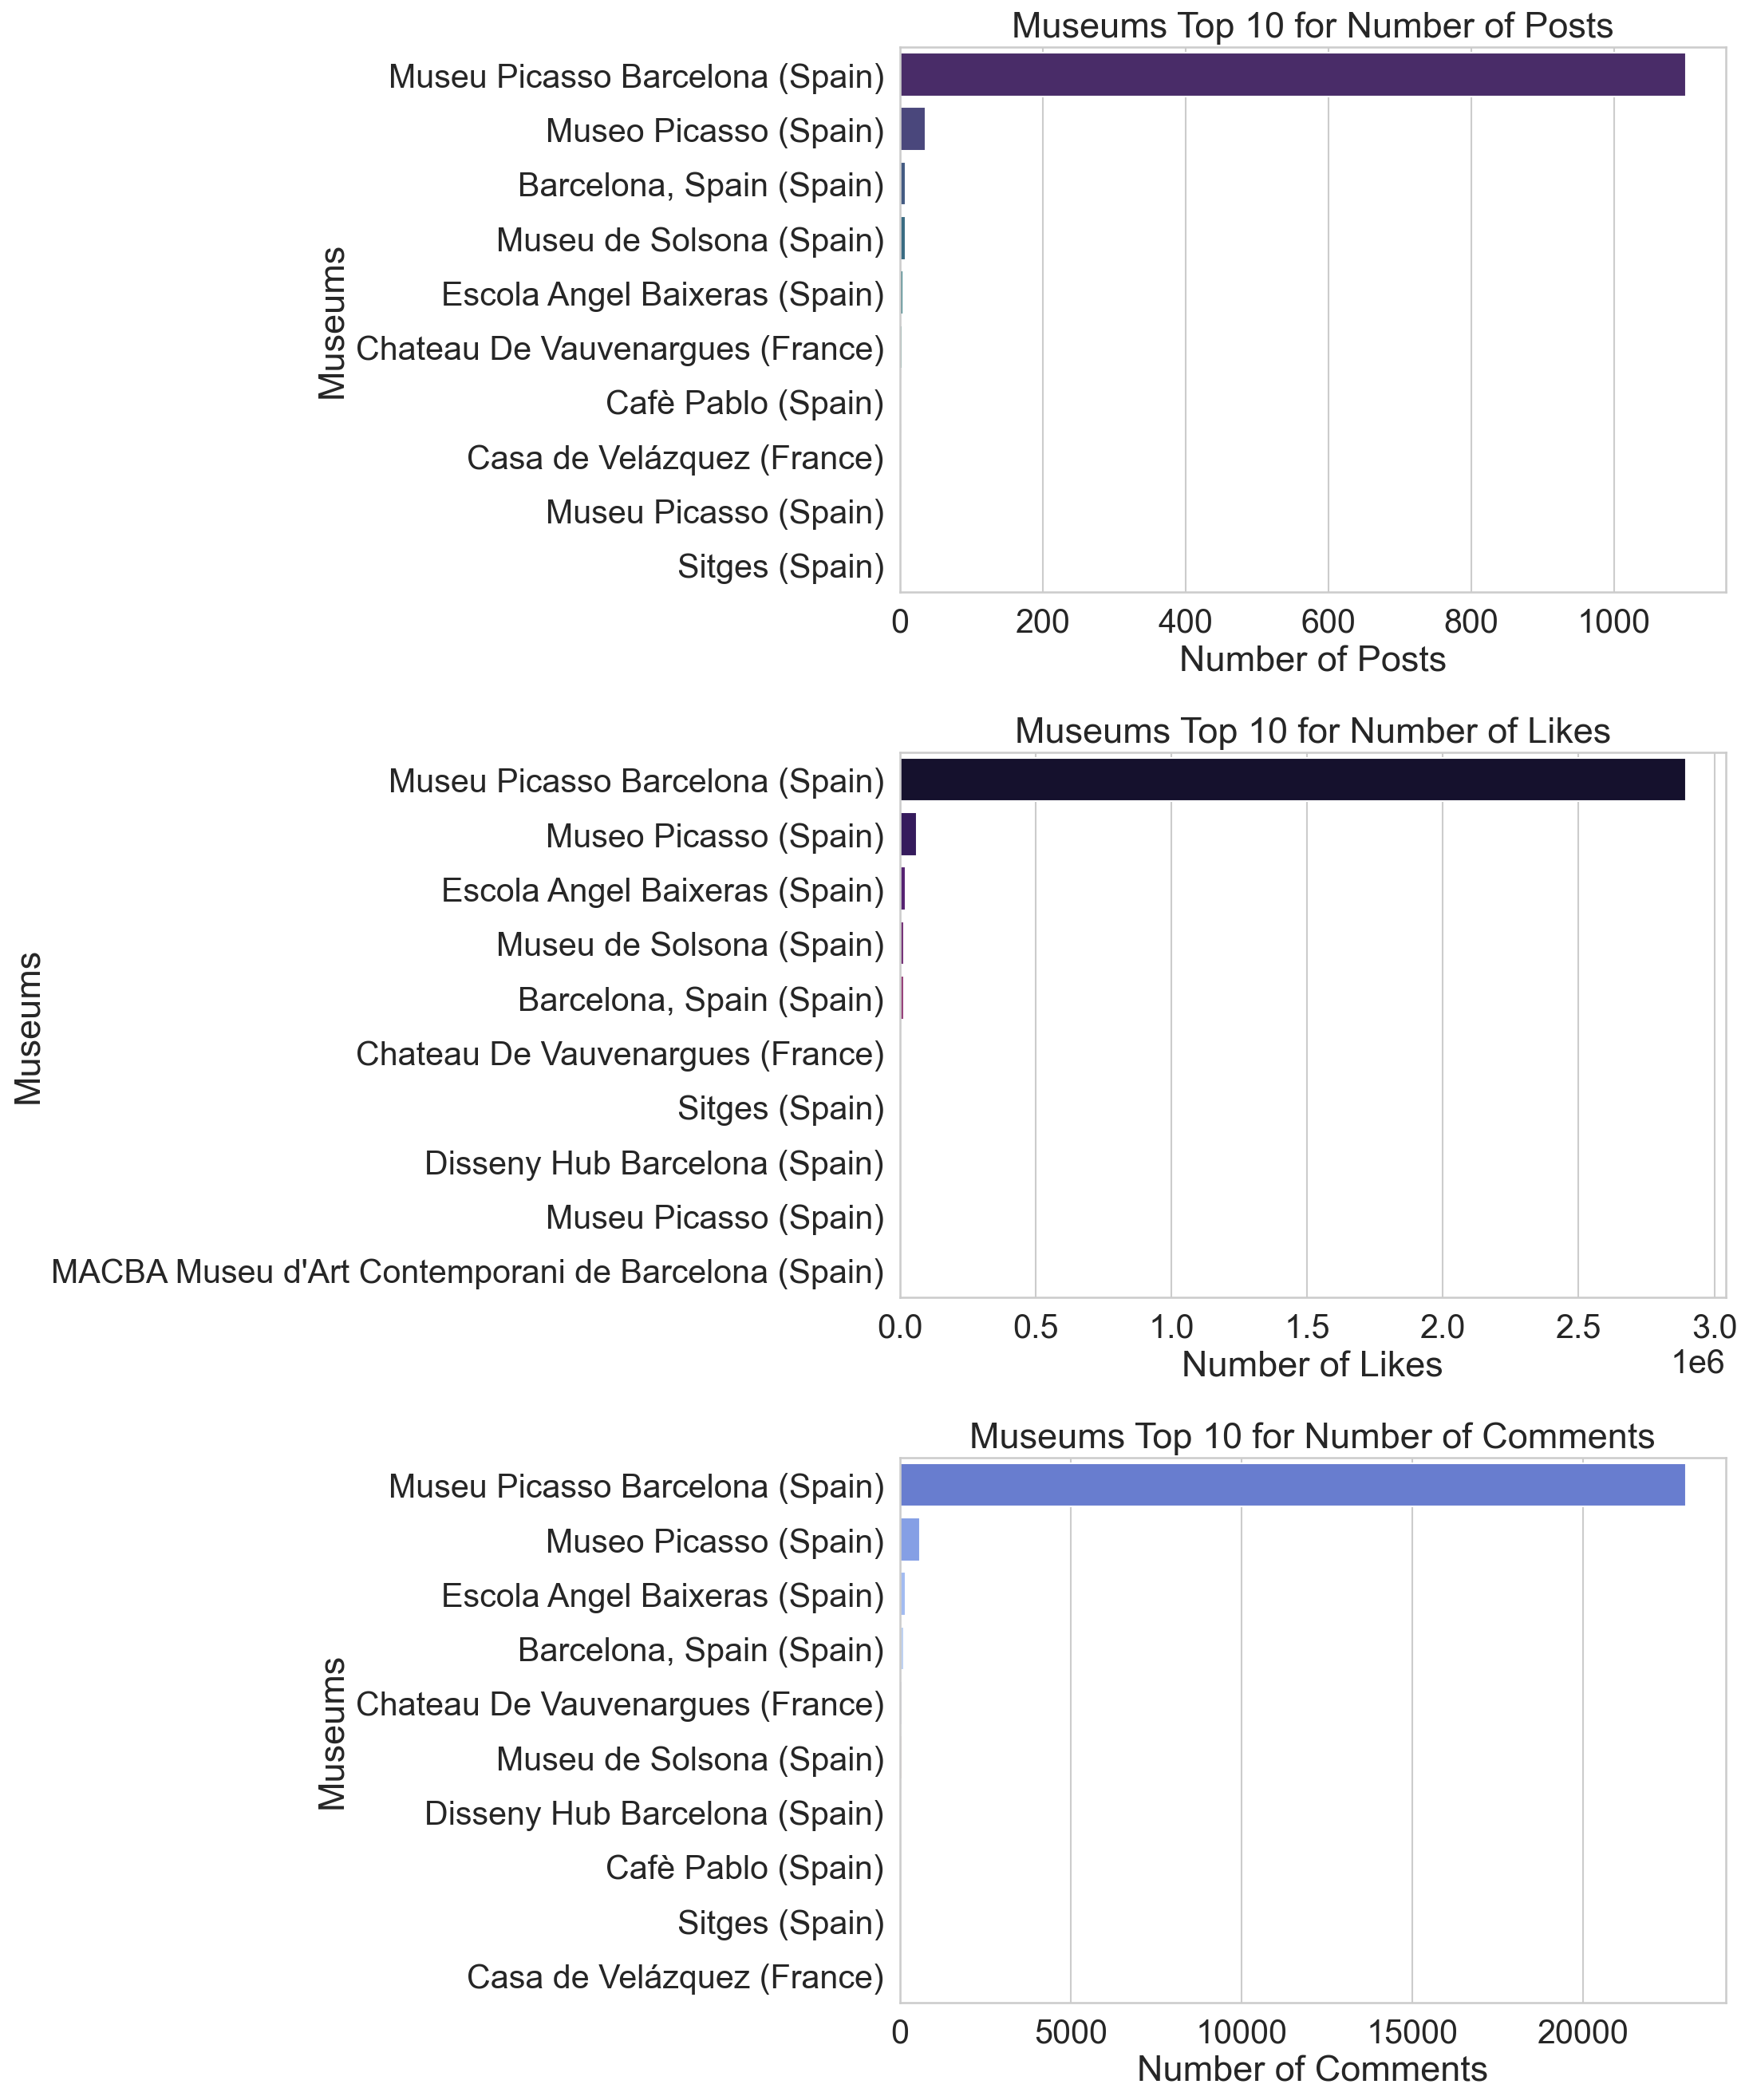

In [9]:
# Create a combined 'Location - Nation' column for better plotting labels
df['location_nation'] = df.apply(lambda row: f"{row['locationName']} ({row['nation']})" if pd.notna(row['nation']) else row['locationName'], axis=1)
df.to_csv('dataset_completo_ultimo_nation.csv', index=False)

#fontsize e stile
plt.rcParams.update({'font.size': 18})
sns.set(font_scale=1.8)
sns.set_style('whitegrid')#

# Calculate the data for the plots, now using the combined 'location_nation'
loc_counts = df['location_nation'].value_counts().nlargest(10)
loc_likes = df.groupby('location_nation')['likes'].sum().nlargest(10)
loc_comments = df.groupby('location_nation')['commentsCount'].sum().nlargest(10)

# Create the 3x1 subplot
fig, axes = plt.subplots(3, 1, figsize=(15, 18), dpi=150) # 3 rows, 1 column. Adjust figsize as needed.

# Plot 1: Top 10 Locations by Number of Posts
sns.barplot(x=loc_counts.values, y=loc_counts.index, palette='viridis', ax=axes[0])
axes[0].set_title("Museums Top 10 for Number of Posts")
axes[0].set_xlabel("Number of Posts")
axes[0].set_ylabel("Museums")

# Plot 2: Top 10 Locations by Total Likes
sns.barplot(x=loc_likes.values, y=loc_likes.index, palette='magma', ax=axes[1])
axes[1].set_title("Museums Top 10 for Number of Likes")
axes[1].set_xlabel("Number of Likes")
axes[1].set_ylabel("Museums")

# Plot 3: Top 10 Locations by Total Comments
sns.barplot(x=loc_comments.values, y=loc_comments.index, palette='coolwarm', ax=axes[2])
axes[2].set_title("Museums Top 10 for Number of Comments")
axes[2].set_xlabel("Number of Comments")
axes[2].set_ylabel("Museums")

plt.tight_layout() # Adjusts subplot params for a tight layout
plt.savefig('locations_with_nation_plots.png', dpi=300)
print("D:\Lavori\ARTICOLI\Bilotta_picasso 2025\Codici\V2\PLOT-300DPI\SOCIAL VALIDATIONS\Plots saved as locations_with_nation_plots.png")

Da qui language detection

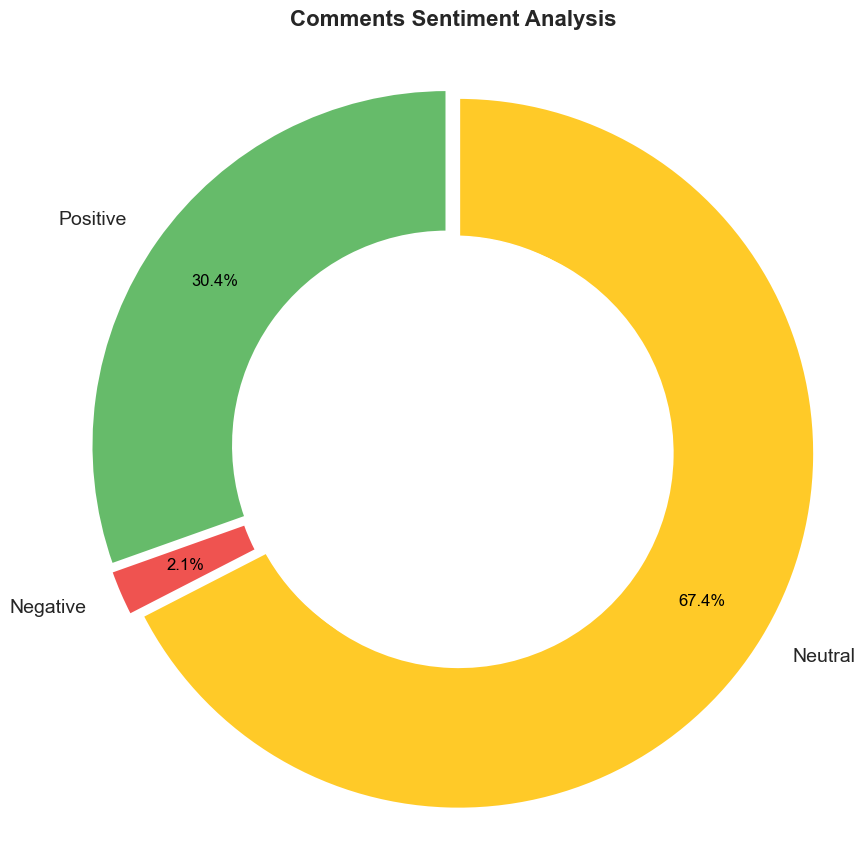


--- Riassunto dei Sentimenti ---
Commenti Positivi: 16355 (30.4%)
Commenti Negativi: 1141 (2.1%)
Commenti Neutri: 36237 (67.4%)
Totale Commenti Analizzati: 53733


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carica il dataset
try:
    # Ho corretto il nome del file per farlo corrispondere al messaggio di errore nel tuo codice
    df = pd.read_csv('./ultimodataset_langdetection.csv', on_bad_lines='skip')
except FileNotFoundError:
    print("Errore: Il file 'ultimodataset_langdetection.csv' non è stato trovato. Assicurati che si trovi nella stessa directory dello script.")
    exit()

# Definisci le colonne dei sentimenti
sentiment_cols = [f'sentiment_comment_{i}' for i in range(1, 11)]

# Inizializza i contatori per ogni categoria di sentimento
positive_count = 0
negative_count = 0
neutral_count = 0

# Itera attraverso le colonne dei sentimenti e conta i valori
for col in sentiment_cols:
    # Assicurati che la colonna esista e che i valori siano validi
    if col in df.columns:
        # Confronta con le stringhe in maiuscolo
        positive_count += (df[col] == 'POSITIVE').sum()
        negative_count += (df[col] == 'NEGATIVE').sum()
        neutral_count += (df[col] == 'NEUTRAL').sum()
    else:
        print(f"Attenzione: La colonna '{col}' non è stata trovata nel dataset.")

# Calcola il totale dei commenti analizzati
total_comments = positive_count + negative_count + neutral_count

if total_comments == 0:
    print("Nessun commento con sentimento valido trovato nelle colonne specificate. Impossibile creare il grafico.")
else:
    # Calcola le percentuali
    positive_percentage = (positive_count / total_comments) * 100
    negative_percentage = (negative_count / total_comments) * 100
    neutral_percentage = (neutral_count / total_comments) * 100

    # Dati per il grafico a ciambella
    labels = ['Positive', 'Negative', 'Neutral']
    sizes = [positive_percentage, negative_percentage, neutral_percentage]

    # Colori più vivaci e armoniosi
    colors = ['#66BB6A', '#EF5350', '#FFCA28'] # Verde medio, Rosso brillante, Giallo ambra

    # Piccolo stacco per le fette
    explode = (0.02, 0.02, 0.02)

    # Crea il grafico a ciambella
    fig1, ax1 = plt.subplots(figsize=(9, 9)) # Aumentata leggermente la dimensione per una migliore visibilità
    wedgeprops = {'width': 0.4, 'edgecolor': 'white', 'linewidth': 2} # Larghezza del "buco" e bordo bianco per un look pulito

    # Crea il grafico
    patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                                         colors=colors, startangle=90, wedgeprops=wedgeprops, pctdistance=0.8)

    # Disegna il cerchio interno per creare l'effetto ciambella
    centre_circle = plt.Circle((0,0), 0.60, fc='white') # Rimpicciolito leggermente il centro
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Migliora lo stile del testo delle percentuali
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(12)

    # Migliora lo stile del testo delle etichette
    for text in texts:
        text.set_fontsize(14)
        text.set_fontweight('regular')

    # Assicurati che il grafico sia un cerchio
    ax1.axis('equal')

    plt.title('Comments Sentiment Analysis', fontsize=16, fontweight='bold', pad=20) # Titolo più grande e in grassetto
    plt.tight_layout() # Ottimizza gli spazi
    
    # --- MODIFICA PER SALVARE A 300 DPI ---
    # Salva il grafico con il nome file specificato e la risoluzione
    plt.savefig('comments_sentiment_300dpi.png', dpi=300)
    
    plt.show()

    print(f"\n--- Riassunto dei Sentimenti ---")
    print(f"Commenti Positivi: {positive_count} ({positive_percentage:.1f}%)")
    print(f"Commenti Negativi: {negative_count} ({negative_percentage:.1f}%)")
    print(f"Commenti Neutri: {neutral_count} ({neutral_percentage:.1f}%)")
    print(f"Totale Commenti Analizzati: {total_comments}")

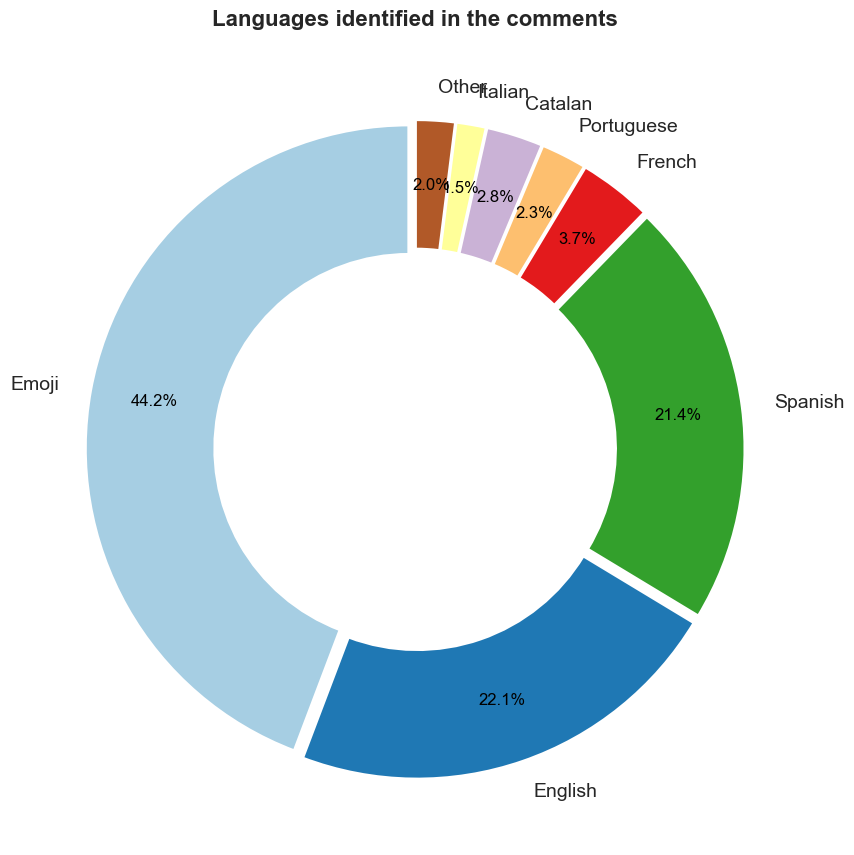


--- Riassunto delle Lingue (Filtrato) ---
Emoji: 9552 (44.2%)
English: 4775 (22.1%)
Spanish: 4616 (21.4%)
French: 793 (3.7%)
Portuguese: 494 (2.3%)
Catalan: 613 (2.8%)
Italian: 324 (1.5%)
Other: 426 (2.0%)
Totale Commenti con Lingua Rilevata (Filtrati): 21593


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Definisci le colonne delle lingue
lang_cols = [f'lang_comment_{i}' for i in range(1, 11)]

# Carica il dataset gestendo gli errori del file
try:
    df = pd.read_csv('./ultimodataset_langdetection.csv')
except FileNotFoundError:
    print("Errore: Il file 'ultimodataset_langdetection.csv' non è stato trovato. Assicurati che si trovi nella stessa directory dello script.")
    exit()
except pd.errors.ParserError as e:
    print(f"Errore di parsing del file CSV: {e}. Il file verrà ricaricato ignorando le righe con errori.")
    try:
        df = pd.read_csv('./ultimodataset_langdetection.csv', on_bad_lines='skip')
    except Exception as e_retry:
        print(f"Errore nel ricaricare il file: {e_retry}. Impossibile procedere.")
        exit()

# Inizializza un dizionario per contare le lingue
lang_counts = {}

# Itera attraverso le colonne delle lingue e conta i valori
for col in lang_cols:
    if col in df.columns:
        # Pulisci e conta i valori
        column_counts = df[col].astype(str).str.upper().value_counts()
        for lang, count in column_counts.items():
            # Escludi stringhe vuote o valori non rilevanti
            if lang and lang not in ['NAN', 'VUOTO', 'UNKNOWN', 'SCONOSCIUTO']:
                lang_counts[lang] = lang_counts.get(lang, 0) + count
    else:
        print(f"Attenzione: La colonna '{col}' non è stata trovata nel dataset.")

# Se non ci sono dati sulle lingue, esci
if not lang_counts:
    print("Nessun dato sulle lingue valido trovato nelle colonne specificate. Impossibile creare il grafico.")
else:
    # Prepara i dati per il grafico
    labels_all = list(lang_counts.keys())
    sizes_all = list(lang_counts.values())
    total_languages_all = sum(sizes_all)

    # Filtra le lingue sotto l'1% e raggruppa il resto in "Altro"
    MIN_PERCENTAGE = 1.0
    filtered_labels = []
    filtered_sizes = []
    other_count = 0

    for i, label in enumerate(labels_all):
        percentage = (sizes_all[i] / total_languages_all) * 100
        if percentage >= MIN_PERCENTAGE:
            filtered_labels.append(label)
            filtered_sizes.append(sizes_all[i])
        else:
            other_count += sizes_all[i]

    if other_count > 0:
        filtered_labels.append('ALTRO')
        filtered_sizes.append(other_count)

    total_languages_filtered = sum(filtered_sizes)
    percentages = [(count / total_languages_filtered) * 100 for count in filtered_sizes]

    # Mappa le etichette per una migliore leggibilità nel grafico
    display_labels = {
        'IT': 'Italian', 'EN': 'English', 'ES': 'Spanish', 'FR': 'French',
        'DE': 'German', 'PT': 'Portuguese', 'NL': 'Dutch', 'CA': 'Catalan',
        'KO': 'Korean', 'EMOJI': 'Emoji', 'ALTRO': 'Other',
    }
    plot_labels = [display_labels.get(label, label) for label in filtered_labels]
    colors = plt.cm.Paired(np.linspace(0, 1, len(filtered_labels)))
    explode = [0.02] * len(filtered_labels)

    # Crea il grafico a ciambella
    fig1, ax1 = plt.subplots(figsize=(9, 9))
    wedgeprops = {'width': 0.4, 'edgecolor': 'white', 'linewidth': 2}
    patches, texts, autotexts = ax1.pie(filtered_sizes, explode=explode, labels=plot_labels, autopct='%1.1f%%',
                                         colors=colors, startangle=90, wedgeprops=wedgeprops, pctdistance=0.8)

    # Disegna il cerchio interno
    centre_circle = plt.Circle((0,0), 0.60, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Migliora lo stile del testo
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(12)
        autotext.set_fontweight('regular')
    for text in texts:
        text.set_fontsize(14)
        text.set_fontweight('regular')

    ax1.axis('equal')
    plt.title('Languages identified in the comments', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    
    # --- MODIFICA: SALVA IL GRAFICO A 300 DPI ---
    # Salva il grafico con il nome 'comments_languages_300dpi.png' e risoluzione 300 DPI
    plt.savefig('./comments_languages_300dpi.png', dpi=300)
    
    plt.show()

    # Stampa riassunto
    print(f"\n--- Riassunto delle Lingue (Filtrato) ---")
    for i, lang in enumerate(filtered_labels):
        print(f"{display_labels.get(lang, lang)}: {int(filtered_sizes[i])} ({percentages[i]:.1f}%)")
    print(f"Totale Commenti con Lingua Rilevata (Filtrati): {total_languages_filtered}")